## Market Share

This notebook is to try plotting market share analysis.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import scipy.stats as stats

In [24]:
%%capture
%run create_distribution.ipynb

First, random sales data is generated for two imaginary companies. For this I'll use a function from my `create_distribution.ipynb` notebook.

In [25]:
comp_1 = create_distrib("2*x+50", sd=40, low=100, high=500, by=10, show=False, even=True)
print(comp_1.head(5))

comp_2 = create_distrib("1*x+50", sd=40, low=100, high=500, by=10, show=False, even=True)
print(comp_2.head(5))

     x           y
0  100  288.981296
1  110  238.410738
2  120  322.628573
3  130  363.848900
4  140  320.335774
     x           y
0  100  203.411365
1  110  148.149173
2  120  194.558637
3  130  173.703868
4  140  161.435090


The two dataframes can be combined.

In [26]:
df = pd.merge(comp_1, comp_2, on='x')
df.columns = ['x','Company 1', 'Company 2']
print(df.head(5))

     x   Company 1   Company 2
0  100  288.981296  203.411365
1  110  238.410738  148.149173
2  120  322.628573  194.558637
3  130  363.848900  173.703868
4  140  320.335774  161.435090


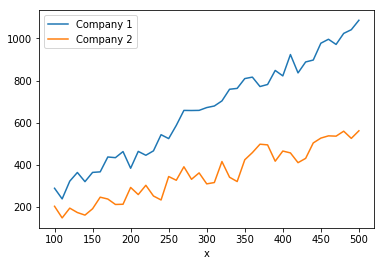

In [27]:
df.plot('x', ['Company 1','Company 2'])
plt.show()

Next, this is a plot of market share. Market share percentages add up to 100% so if only two companies are used, the lines will be symetrical around a midpoint.

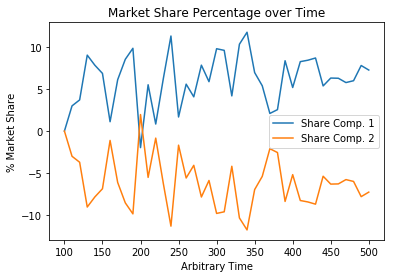

In [28]:
start1 = df['Company 1'][0]/(df['Company 1'][0]+df['Company 2'][0])
start2 = df['Company 2'][0]/(df['Company 1'][0]+df['Company 2'][0])
df = df.assign(s1=pd.Series((df['Company 1']/(df['Company 1']+df['Company 2'])-start1)*100))
df = df.assign(s2=pd.Series((df['Company 2']/(df['Company 1']+df['Company 2'])-start2)*100))
df.columns = ['x','Company 1','Company 2','Share Comp. 1','Share Comp. 2']
df.plot('x', ['Share Comp. 1','Share Comp. 2'])
plt.xlabel("Arbitrary Time")
plt.ylabel("% Market Share")
plt.title("Market Share Percentage over Time")
plt.show()

Let's create a function to do this now, for any number of companies.

In [116]:
def market_share_plot(dat, xlab=None, tick=5, trend=False):
    import sys
    
    if xlab is not None:
        if dat.shape[0] is not len(xlab):
            print("Error: xlab length does not match the data")
            print(str(dat.shape[0]) + " != " + str(len(xlab)))
            sys.exit(1)
        
    dat = pd.DataFrame(dat)
    num_companies = dat.shape[1] - 1
    
    company_names = []
    for column_name in dat.columns:
        if column_name is not "x":
            company_names.append(column_name)
        
    probs = pd.DataFrame()
    comp = 0
    for company in company_names:
        start = dat[company][0]/(dat.loc[0,dat.columns != 'x'].sum())*100
        prob_row = []
        for row in range(len(dat[company])):
            prob = (dat[company][row]/(dat.loc[row,dat.columns != 'x'].sum()))  *100 -start
            prob_row.append(prob)

        probs = probs.assign(c=pd.Series(prob_row))
        probs = probs.rename(columns = { 'c' : company_names[comp]})
        comp += 1
    
    probs.plot()
    plt.xlabel("Time Range")
    plt.ylabel("% Change")
    
    if xlab is not None:
        plt.xticks(np.arange(len(xlab), step=tick), xlab[0::tick], rotation=-75)
    
    if trend:
        xrange = np.arange(0,probs.shape[0],1)
        for p in probs:
            slope, intercept, r, p, error = scipy.stats.linregress(xrange, probs[p])
            line = slope * xrange + intercept
            plt.plot(xrange, line, color="black", linestyle="--", linewidth=1)
        
    plt.title("Change in Market Share Over Time")
    plt.axhline(y=0, color="gray", linewidth=1, linestyle="--")
    plt.show()

Let's test it now. Below, data is created for two companies, and then plotted.

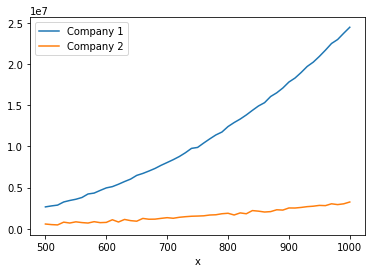

In [117]:
comp_1 = create_distrib("x**2*x/40-500000", sd=90000, low=500, high=1000, by=10, show=False, even=True)
comp_2 = create_distrib("x**1.5*x/10-x*10", sd=90000, low=500, high=1000, by=10, show=False, even=True)

df = pd.merge(comp_1, comp_2, on='x')
df.columns = ['x','Company 1', 'Company 2']

df.plot('x', ['Company 1','Company 2'])
plt.show()

Then with one line we can create the Market Share plot.

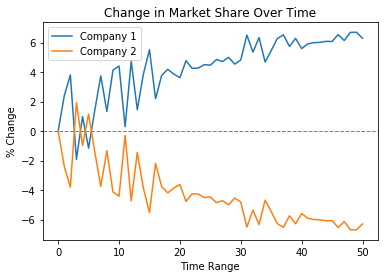

In [118]:
market_share_plot(df)

Now let's do the same thing, but for three different companies.

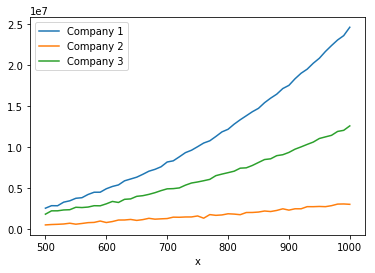

In [119]:
comp_1 = create_distrib("x**2*x/40-500000", sd=90000, low=500, high=1000, by=10, show=False, even=True)
comp_2 = create_distrib("x**1.5*x/10-x*10", sd=90000, low=500, high=1000, by=10, show=False, even=True)
comp_3 = create_distrib("x**1.7*x/10-x*10", sd=90000, low=500, high=1000, by=10, show=False, even=True)

df = pd.merge(comp_1, comp_2, on='x')
df = pd.merge(df, comp_3, on='x')
df.columns = ['x','Company 1','Company 2','Company 3']
df.plot('x', ['Company 1','Company 2', 'Company 3'])
plt.show()

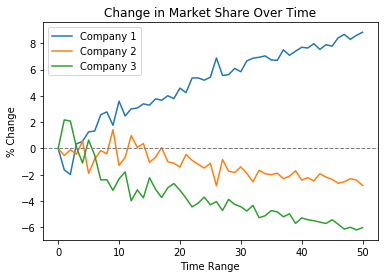

In [120]:
market_share_plot(df)

Let's test the x label feature of the `market_share_plot()` function, and the trend line feature of the function.

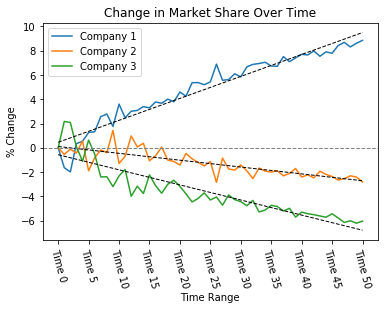

In [123]:
xlab = []
for t in range(51):
    xlab.append("Time " + str(t))
market_share_plot(df, xlab, trend=True)